In [1]:
import json
import pandas as pd
import seaborn as sns

In [2]:
all_tweets = pd.read_json("data/baby_formula.json")

In [3]:
all_tweets_sample = all_tweets.sample(1000)
all_tweets_sample

,id,text,author_id,created_at,public_metrics,entities,author,withheld
346852,1525100221943930880,"@K_JeanPierre Democrat Men, your all in this t...",1451904065588367360,2022-05-13 13:06:42+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 13, 'usernam...","{'public_metrics': {'followers_count': 8, 'fol...",NaN
518389,1523821665393815552,Yeah cuz thats important right now. How about...,1514716656282525696,2022-05-10 00:26:10+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 149, 'end': 172, 'url': 'h...","{'public_metrics': {'followers_count': 16, 'fo...",NaN
360,1527875362364936192,"""Breast is best"" now belongs to the elites. ht...",16420692,2022-05-21 04:54:07+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 44, 'end': 67, 'url': 'htt...","{'created_at': '2008-09-23T15:47:08.000Z', 'us...",NaN
460781,1524467272399527936,"All of this money, but somehow the United Stat...",2274042686,2022-05-11 19:11:35+00:00,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'annotations': [{'start': 35, 'end': 47, 'pro...","{'id': '2274042686', 'username': 'SaveByLessar...",NaN
246079,1525575725159677952,@JesseKellyDC How dare you! And I bet you have...,307536064,2022-05-14 20:36:11+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 13, 'usernam...","{'verified': False, 'name': 'HaPy', 'username'...",NaN
...,...,...,...,...,...,...,...,...
142286,1526920202369253376,@1WitchyChick @Ann_Kelly007 @ErinJH_9011 @even...,174007151,2022-05-18 13:38:39+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 13, 'usernam...","{'id': '174007151', 'username': 'Xenomorph10',...",NaN
464446,1524444764401242112,@DrJBhattacharya Is it true pallets of infant ...,2499831370,2022-05-11 17:42:09+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 16, 'usernam...","{'name': 'Cynthia Spradlin', 'created_at': '20...",NaN
326445,1525166508598513664,John Legend reacted to the Republican congress...,9695312,2022-05-13 17:30:06+00:00,"{'retweet_count': 20, 'reply_count': 9, 'like_...","{'urls': [{'start': 115, 'end': 138, 'url': 'h...","{'created_at': '2007-10-25T21:33:23.000Z', 'id...",NaN
133760,1526996214214008832,@cvpayne @GaryKaltbaum\n@FoxBusiness If Pelosi...,1424820416921616384,2022-05-18 18:40:42+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 82, 'end': 100, 'tag':...","{'created_at': '2021-08-09T19:50:59.000Z', 'na...",NaN


### Cleaning Text

In [4]:
import re

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

import nltk
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def clean_text_basic(text):
    '''
    Normalizes text, removes unicode chars
        Params:
            text (string): text to be normalized
        Returns:
            cleaned_text (string): The text cleaned with the steps above
    '''
    # regular expression from https://monkeylearn.com/blog/text-cleaning/
    cleaned_text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

def clean_text_level2(text):
    '''
    Cleans with the basic steps but also removes stop words and lemmatizes
        Params:
            text (string): text to be normalized
        Returns:
            cleaned_text (string): The text cleaned with the steps above
    '''
    text = clean_text_basic(text)
    stoppies = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    # expression partially from https://monkeylearn.com/blog/text-cleaning/
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in (stoppies)])
    return cleaned_text


[nltk_data] Downloading package stopwords to /home/rohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rohan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
all_tweets_sample["clean_text"] = all_tweets_sample["text"].apply(clean_text_basic)
all_tweets_sample["very_clean_text"] = all_tweets_sample["text"].apply(clean_text_level2)
all_tweets_sample

,id,text,author_id,created_at,public_metrics,entities,author,withheld,clean_text,very_clean_text
346852,1525100221943930880,"@K_JeanPierre Democrat Men, your all in this t...",1451904065588367360,2022-05-13 13:06:42+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 13, 'usernam...","{'public_metrics': {'followers_count': 8, 'fol...",NaN,kjeanpierre democrat men your all in this toge...,kjeanpierre democrat men togetherfight baby fo...
518389,1523821665393815552,Yeah cuz thats important right now. How about...,1514716656282525696,2022-05-10 00:26:10+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 149, 'end': 172, 'url': 'h...","{'public_metrics': {'followers_count': 16, 'fo...",NaN,yeah cuz thats important right now how about ...,yeah cuz thats important right go find baby fo...
360,1527875362364936192,"""Breast is best"" now belongs to the elites. ht...",16420692,2022-05-21 04:54:07+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 44, 'end': 67, 'url': 'htt...","{'created_at': '2008-09-23T15:47:08.000Z', 'us...",NaN,breast is best now belongs to the elites via ...,breast best belongs elite via slate
460781,1524467272399527936,"All of this money, but somehow the United Stat...",2274042686,2022-05-11 19:11:35+00:00,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'annotations': [{'start': 35, 'end': 47, 'pro...","{'id': '2274042686', 'username': 'SaveByLessar...",NaN,all of this money but somehow the united state...,money somehow united state baby formulawhy
246079,1525575725159677952,@JesseKellyDC How dare you! And I bet you have...,307536064,2022-05-14 20:36:11+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 13, 'usernam...","{'verified': False, 'name': 'HaPy', 'username'...",NaN,jessekellydc how dare you and i bet you have f...,jessekellydc dare bet food go microwave maybe ...
...,...,...,...,...,...,...,...,...,...,...
142286,1526920202369253376,@1WitchyChick @Ann_Kelly007 @ErinJH_9011 @even...,174007151,2022-05-18 13:38:39+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 13, 'usernam...","{'id': '174007151', 'username': 'Xenomorph10',...",NaN,1witchychick annkelly007 erinjh9011 evenmorebi...,1witchychick annkelly007 erinjh9011 evenmorebi...
464446,1524444764401242112,@DrJBhattacharya Is it true pallets of infant ...,2499831370,2022-05-11 17:42:09+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 16, 'usernam...","{'name': 'Cynthia Spradlin', 'created_at': '20...",NaN,drjbhattacharya is it true pallets of infant f...,drjbhattacharya true pallet infant formula del...
326445,1525166508598513664,John Legend reacted to the Republican congress...,9695312,2022-05-13 17:30:06+00:00,"{'retweet_count': 20, 'reply_count': 9, 'like_...","{'urls': [{'start': 115, 'end': 138, 'url': 'h...","{'created_at': '2007-10-25T21:33:23.000Z', 'id...",NaN,john legend reacted to the republican congress...,john legend reacted republican congressman wro...
133760,1526996214214008832,@cvpayne @GaryKaltbaum\n@FoxBusiness If Pelosi...,1424820416921616384,2022-05-18 18:40:42+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 82, 'end': 100, 'tag':...","{'created_at': '2021-08-09T19:50:59.000Z', 'na...",NaN,cvpayne garykaltbaumfoxbusiness if pelosi is l...,cvpayne garykaltbaumfoxbusiness pelosi looking...


### Sentiment Analyzers

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    '''
    Gets the sentiment score of text from the nltk sentiment thingy.
        Params:
            text (string): Text to analyze
        Returns:
            sent (float): Real number from -1 to 1
    '''
    return sia.polarity_scores(text)["compound"]

from flair.models import TextClassifier
from flair.data import Sentence
flair_sia = TextClassifier.load('en-sentiment')
def get_sentiment_flair(text):
    # RETURNS CONFIDENCE, NOT POLARITY, DO NOT CONFUSE FOR POLARITY CAUSE IT'S CONFIDENCE
    sentence = Sentence(text)
    flair_sia.predict(sentence)
    try:
        pol = sentence.labels[0].to_dict()
    except:
        return 0.0
    if pol["value"] == "NEGATIVE":
        pol["confidence"] *= -1
    return pol["confidence"]
get_sentiment_flair(all_tweets_sample.iloc[0]["very_clean_text"])
all_tweets_sample.iloc[0]["text"]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rohan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2022-05-29 14:27:10.230722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 14:27:10.230771: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-05-29 14:27:12,140 loading file /home/rohan/.flair/models/sentiment-en-mix-distillbert_4.pt


'@K_JeanPierre Democrat Men, your all in this together...Fight the baby formula shortage by using this and donate your breast milk! https://t.co/jfBAq77kXH'

In [7]:
all_tweets_sample["sentiment"] = all_tweets_sample["clean_text"].apply(get_sentiment)
all_tweets_sample["very_clean_sentiment"] = all_tweets_sample["very_clean_text"].apply(get_sentiment)
all_tweets_sample["flair_sentiment_confidence"] = all_tweets_sample["clean_text"].apply(get_sentiment_flair)

2022-05-29 14:27:20,904 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:21,291 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:22,003 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:22,675 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:22,841 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:23,684 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:23,930 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:27,158 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:27,877 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-05-29 14:27:28,148 Warning: An empty Sentence was 

In [9]:
def show_sentiments(index):
    display(all_tweets_sample["text"].iloc[index])
    display(all_tweets_sample["sentiment"].iloc[index])
    display(all_tweets_sample["very_clean_sentiment"].iloc[index])
    display(all_tweets_sample["flair_sentiment_confidence"].iloc[index])
show_sentiments(3)

'All of this money, but somehow the United States is out of baby formula?\n\nWHY?!'

0.5719

0.4215

-0.9930806756019592

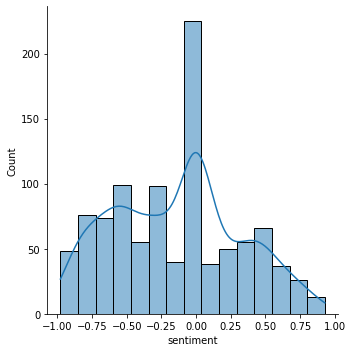

In [10]:
sns.displot(all_tweets_sample["sentiment"], kde=True)

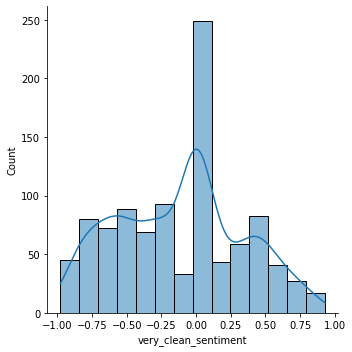

In [11]:
sns.displot(all_tweets_sample["very_clean_sentiment"], kde=True)

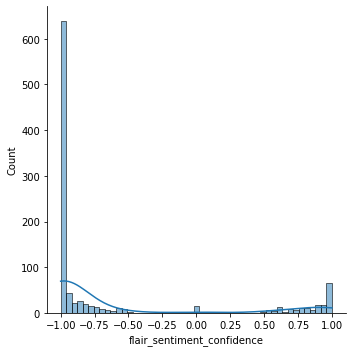

In [12]:
sns.displot(all_tweets_sample["flair_sentiment_confidence"], kde=True)

### Roe V Wade Stuff

In [16]:
roevwade_exp = r"(roe)|(wade)|(abort\w+)|(pro.?life)|(pro.?choice)|(fetus)"
all_tweets_sample["has_abortion_word"] = all_tweets_sample["clean_text"].str.contains(roevwade_exp)
abortion_tweets = all_tweets_sample[all_tweets_sample["has_abortion_word"] == True]
display(len(abortion_tweets))
abortion_tweets["text"].apply(lambda x: display(x))

/tmp/ipykernel_21463/454460589.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  all_tweets_sample["has_abortion_word"] = all_tweets_sample["clean_text"].str.contains(roevwade_exp)


41

'@RawStory @JoyAnnReid GOP bumper sticker: Drill for baby formula independence before aborted critical race theory gay groomer border babies drink it all at inflated prices!'

'The Republican Party, the same party that is banning abortion access to women across the US in the name of being ‘pro-life’, have just rejected a bill of $29 million to aid the US baby formula shortage. I am actually gobsmacked at their hypocrisy. Like how do they not see it?'

'PPD/PPA/PPP = why I am so violently pro-abortion. If your mental health is iffy pre/peripartum, it can be a million times worse post. The rage, sleep deprivation, inability to breastfeed coupled with a fairly traumatic pregnancy/birthing experience - would not wish that on anyone https://t.co/wW8I4p4Ypt'

"@Jaizem How convenient, With the baby formula shortage... They will say see look, we need abortion bc 'childbearing persons' can't feed their babies..\nAll ready hearing that our children are starving bc the government isn't providing enough"

'Kamala\'s great promo, "no baby formula, therefore abort your children".  Is it mere coincidence the abortion leak &amp; baby formula issue happened at the same time?  #DemonCrats say no breast feeding or formula, therefore baby looses his/her life.  Sorry  only 2 genders to destroy. https://t.co/ImfmFVEsMb'

'So the "pro-life" group is demanding Biden push this plant to reopen to continue producing toxic baby formula. Why does he want to poison babies? https://t.co/NBmsWLEBC9'

'@LukeSte38396471 @J_sin_official @shanearama @elonmusk Party of communist. Ask anyone born k. The 40s how abortion laws worked out for that generation. Now stop protecting babies while all republicans voted no on baby formula. Just stop protecting these maniacs'

'There was never a baby formula shortage till men started giving birth. Abortion is a mans right too. As we are birthing people too, Not just woman. BTW Biden is hording formula on the southern boarder. @Kat_Cammack made me aware of @POTUS letting our newborns starve. https://t.co/gNvpXCHnio'

'Just so I’m clear:\n\nThey’re working to overturn Roe v. Wade during a pandemic and infant formula shortage, while people  are struggling with their jobs or TSA not properly accommodating breastfeeding parents?'

'@daveweigel @owillis If Dems can’t re-focus “Defund” around anti-abortion movement, then they aren’t being creative enough.\n\n“GOP votes to defund baby formula! Pro-baby malnutrition party just wants women to birth more starving babies!”'

'We see you. All 192 of you "pro-life" Republicans voting against feeding babies. \n\nJust to be clear, when exactly is it that being "pro-life" kicks in? Just for abortion? \n\nhttps://t.co/BUvhCfnNpo'

'@cruzforil He’s pro abortion so baby formula shortage is NOT an issue. Our “Devout” Catholic resident of the White House…'

"@mybiznoturs84 @Prolife_Sam Don't be silly, there are LOTS of men right now trying desperately to learn to breastfeed."

'Bitch STFU. You’re pro-life but voted against baby formula? I hope Georgia votes you out. https://t.co/LymrskCYtj'

'America… has no /limited baby formula but makes it illegal to have an abortion so…more babies needing formula? #babyformula #abortionrights what fucking century are we in?'

'@EliseStefanik Why would ANYONE vote for this VILE LIAR?\n\n1. Biden has a plan👇🏼\n\n 2. She constantly whines that US should detain immigrants — now “pro-life” Elise wants us to (illegally) STARVE those babies in our care?\n\n3. A US Rep casually calling Dems “pedo grifters”?https://t.co/ceja53pCOQ'

"@NoLieWithBTC Don't forget the deregulation policies. The corps making US baby formula invested in stock buy backs instead of maintaining the machines resulting in bacteria that made 4 babies sick of which 2 died. The pro-life party MY ASS!!!!"

"We're short on baby formula for babies.\n\nThe Left: Argh, that means we should allow more abortions.\n\nThe Right: Argh, that means we should let illegal babies starve to death!\n\nDon't our concern for cute cuddly little babies just bring out the best in everyone!"

'#BidenAdministration know they can not solve inflation and shortage of baby foods, they said it is better to permit to kill the babies. No baby formula, free abortion. No food= No babies. #DemocratsAreADisaster . https://t.co/C9lzcut9tg'

'@ericswalwell Your party deserves to lose in Nov if every candidate fails to make this along with baby formula vote and anti-abortion stance of Rs the only issues they run on.'

'Tomorrows tweet: \n\n“You want more baby formula on the shelves?\n\nLet’s make sure we codify #RoeVWade”\n\nI swear I could work at this White House. https://t.co/nFgMHPdmef https://t.co/MrJ1q4TnZM'

'Listen look through there eyes👀 \n&amp; you will see their lies\nThere’s no shortage of baby formula they want you to think things are\ngetting worse \nso you keep having Abortions\ngiving your souls away for money \nOnly true love❤️will make you happy remember this before U kill a baby🙏'

'must be all those liberal abortion machines &amp; EVs shipping baby formula to Mexico https://t.co/JWoBDhYYn5'

'@LeaderMcConnell VOTE \n#LIBERTY #PRINCIPLE #TRUTH\n#AMERICAFIRST #USA #MAGA #PROLIFE #CONSTITUTION #LAWANDORDER #Trump #PATRIOTS #1A #2A #GODFIRST 🇺🇸\n\nSAY NO TO #RINO &amp; #DEMOCRAT #SELLOUTS #COMMIES #SOCIALIST #NAZI #abortion #RoeVWade  #BabyFormulaCrisis #IllegalAliens\n\nhttps://t.co/iyU0PCxbt6'

'Psaki - it’s morally right to send baby formula to illegal immigrant babies vs ours. And let’s support abortion 😂🤷\u200d♂️🤦\u200d♂️ #CantMakeThisUp'

"@ZerlinaShow @MSNBC @ZerlinaMaxwell Do you find it odd the politicians and media is more worried about an abortion shortage than they are about a Baby Formula shortage? Do you think it's because the Politicians and Liberal media are eating baby fetuses? https://t.co/vwzh2KaZku"

"Breastfeeding moms, please consider donating breastmilk to Pro-Life Birth Centers for those having trouble obtaining baby formula as a beautiful witness of pro-lifers' commitment to supporting Life at all stages. Our Lady of La Leche Pray Mothers of Infants. https://t.co/sAxylXPakQ"

'Republicans: Do not get an abortion, that’s murder\n\nAlso Republicans: Let’s instead starve the babies after we force you to carry them by voting against baby formula\n\nThis is the party that @elonmusk loves smh https://t.co/boLXxNeKoH'

'@TheTNHoller @TNGOP @RepTimBurchett @RepChuck @RepMarkGreen @DesJarlaisTN04 @DHarshbargerTN1 HR7790 is literally a PRO-LIFE piece of legislation. These monsters just don’t give any fucks about newborns and infants once the cord is cut. Killin’ kids to own the libs, USA USA USA. #BabyFormulaShortage'

"@RepStefanik So you aren't pro life?? or only pro white life??  And this law that provides for migrants goes back to 1997. Learn your facts. #GOPLiesAboutEverything \nhttps://t.co/UWXlFTWYgY"

'Here are facts:\n\nThe bullshit Pro-life frauds in the GQP voted AGAINST\n\nBaby formula \nWIC for Baby Formula \nDomestic Terrorism Prevention Act. \n\nThese are not words or bullshit talk, THESE ARE THEIR ACTIONS \n\nTHEY VOTED NO \n\nVOTE OUT ALL THESE FRAUDS https://t.co/r7B1Bs2UuD'

'@GOPLeader VOTE \n#LIBERTY #PRINCIPLE #TRUTH\n#AMERICAFIRST #USA #MAGA #PROLIFE #CONSTITUTION #LAWANDORDER #Trump #PATRIOTS #1A #2A #GODFIRST 🇺🇸\n\nSAY NO TO #RINO &amp; #DEMOCRAT #SELLOUTS #COMMIES #SOCIALIST #NAZI #abortion #RoeVWade  #BabyFormulaCrisis #IllegalAliens\n\nhttps://t.co/iyU0PCxbt6'

'@RyanB81111387 @kayleighmcenany The Democrats are talking to these 13-17 years old to seek an abortion.  No need for baby formula.'

'Infant formula is infant healthcare \n\nRepublicans voted against healthcare \n\nRepublicans don’t care about infant healthcare.\n\nRepublicans don’t care about neonatal healthcare.\n\nThey are Not ProLife, they are pro-control.'

"@lindyli @BradleyWhitford @EliseStefanik can't even read clear words on products on these pallets that pudgy little asswipe is burbling about. Even if it were baby formula, sounds like this alleged pro-lifer wants to starve babies. Maybe she's a Q-loon who hopes Dems will starve without babies to eat."

'@Jim_Jordan Get baby formula in America!  Who cares about roe v wade.  We are dying here in America!!!  Fix it.'

'Democrats: Forget about #gasprices, grocery prices, food &amp; baby formula shortages, the economy, inflation, immigration and crime! The midterms are about abortions, stupid! https://t.co/jypRU8zBPK'

'@realreysanchez @FoxNews Babies starving, because Biden send all babies formula to illegals, while Americans cannot get it. Dems hoped, every baby will be aborted, so they won’t need baby formula. And it they survive, they’ll be killed by streets violence, thanks to dems DA'

'@Abc434Law Not all women can breast feed, so formula is vital to babies. Since abortion is banned, thank God, it quite a mystery that ILLEGALS get baby formula, but not American Citizens!!! Radical dems are all about murder!!!!!!!!'

'Soooooo abortion bad, starving good?\n\nhttps://t.co/exPCcroK0W'

'@RepMTG Well, shit. Baby formula is out of stock? When abortions are banned, how are all the babies going to be fed, Marg? Since you have so much time to complain, let’s leave the baby formula shortage up to you.'

286414    None
104915    None
457192    None
490959    None
101133    None
392362    None
51126     None
295626    None
378693    None
96847     None
71499     None
521554    None
536650    None
86612     None
34895     None
250272    None
136211    None
390948    None
518705    None
34293     None
286430    None
380762    None
297233    None
139411    None
245725    None
424791    None
429157    None
115256    None
61898     None
318902    None
114957    None
139379    None
226080    None
255058    None
284432    None
487604    None
408364    None
313026    None
381469    None
52051     None
474319    None
Name: text, dtype: object